In [1]:
#Importing libraries
import pystan
%matplotlib inline
import matplotlib.pyplot as plt

### Stan Model:
Below defined is the Stan model with the:<br>
1) Data <br>
2) Parameters  <br>
3) Model <br>

In [2]:
Bio_Data ="""

data {
    int<lower=0> no_of_doses;
    vector[no_of_doses] x;
    int n[no_of_doses];
    int y[no_of_doses];
    vector[2] mu;
    matrix[2,2] cov;
           
}
parameters{
   vector[2] params;
}

model{
params ~ multi_normal(mu,cov);
y ~ binomial_logit(n,params[1]+ params[2]*x);
}
"""
#Implementation of Stan Model
sm = pystan.StanModel(model_code=Bio_Data)
schools_dat = {'no_of_doses': 4,
               'x':[-0.86, -0.30, -0.05, 0.73],
               'n':[5, 5, 5, 5],
               'y':[0, 1, 3, 5],
               'mu': [0,10],
               'cov':[[4,10],[10,100]]}


INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_3bf2e52f6a5648076b4034a856512fe9 NOW.


Lets try to run the above model for 4 chains, with 2500 iterations, where half (1250) is the warm-up

In [28]:
fit = sm.sampling(data=schools_dat, iter=2500, chains=4)

In [29]:
print(fit)

Inference for Stan model: anon_model_3bf2e52f6a5648076b4034a856512fe9.
4 chains, each with iter=2500; warmup=1250; thin=1; 
post-warmup draws per chain=1250, total post-warmup draws=5000.

            mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
params[1]   0.94    0.02   0.89  -0.66   0.32   0.88   1.51   2.78   1788    1.0
params[2]  10.36    0.12   4.65   3.31   6.98   9.74  13.03  21.25   1454    1.0
lp__        -7.1    0.03   1.04  -9.92  -7.48  -6.77  -6.36   -6.1   1272    1.0

Samples were drawn using NUTS at Sat Oct 27 18:33:34 2018.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


### R-Hat Values
As we can clearly see the R_Hat values for: <br> $\alpha$ is 1.0 <br> $\beta$ is 1.0 <br>
Which means, Chains converged and estimates are reliable<br>
Reasoning: As R_Hat values is close to 1 the Chains probably converged and the estimates are reliable

### Scatter Plot of the draws:
Please find below the Scatter plot of the draws

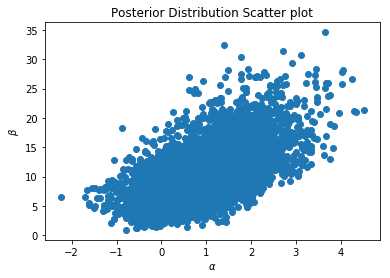

In [30]:
theta=fit.extract()['params']
plt.scatter(theta[:,0],theta[:,1])
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$\beta$')
plt.title('Posterior Distribution Scatter plot')
plt.show()